# Exploratory data analysis


In [13]:
# importing libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [14]:
# loading in DATA
train_df = pd.read_csv('data/kaggle/train.csv').drop('id',axis=1)
builddets=train_df[train_df.columns[1:8].values]


## The building class
i believe the building class would have s strong relationship with the eui


(array([ 6864., 16042.,  3903.,  1788.,  1338.,   339.,  1026., 41708.,
          465.,  2284.]),
 array([ 0. ,  5.9, 11.8, 17.7, 23.6, 29.5, 35.4, 41.3, 47.2, 53.1, 59. ]),
 <a list of 10 Patch objects>)

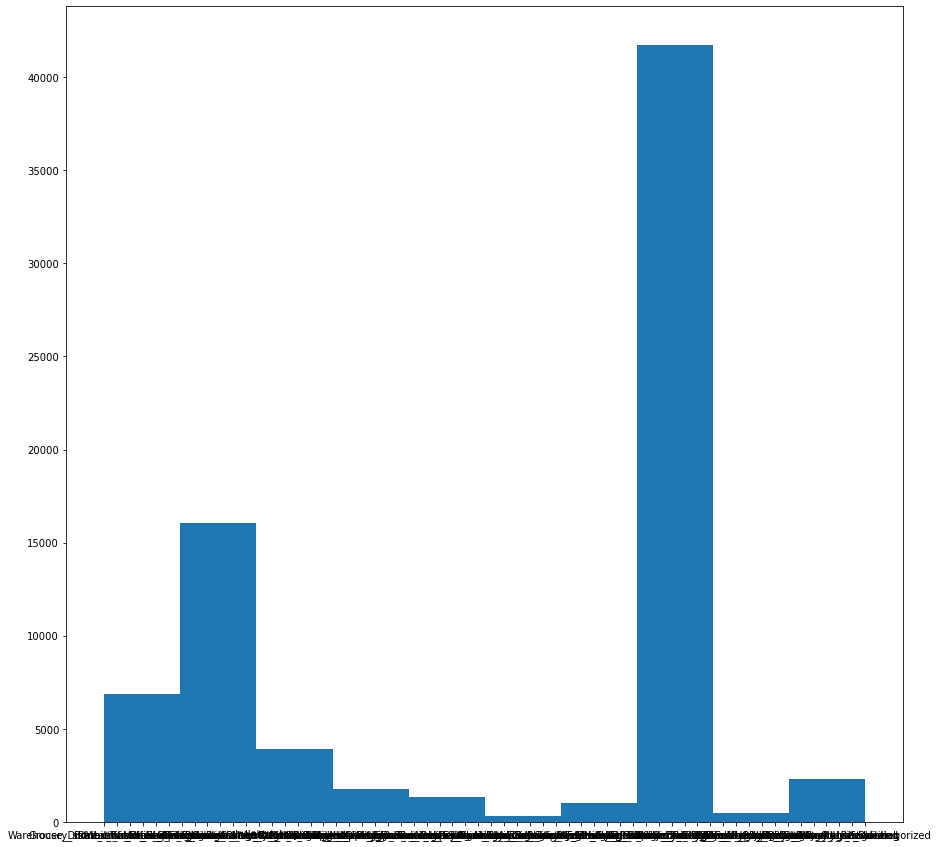

In [15]:
plt.hist(train_df.facility_type)

In [16]:
# pd. set_option('display.max_rows', None)
# train_df[train_df.columns.difference(list(builddets.columns)+list(temperature_dat.columns))].drop(columns='id').describe().transpose()
# #train_df[-temperature_dat]

In [17]:
# pd. set_option('display.max_rows', 10)
# temperature_dat.describe().transpose()

In [18]:
# #df[df.columns.difference(['C', 'D'])]
# train_df[train_df.columns.difference(temperature_dat.columns)]

In [19]:
builddets.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
floor_area,75757.0,165983.865858,246875.790940,943.0,62379.0,91367.0,166000.0,6385382.0
year_built,73920.0,1952.306764,37.053619,0.0,1927.0,1951.0,1977.0,2015.0
energy_star_rating,49048.0,61.048605,28.663683,0.0,40.0,67.0,85.0,100.0
ELEVATION,75757.0,39.506323,60.656596,-6.4,11.9,25.0,42.7,1924.5


In [20]:
naDat = train_df.isna()
naDat = pd.DataFrame(naDat.sum(),columns=['frequency'])
naDat[naDat.frequency>0]
#pd.DataFrame(naDat[naDat.>0].sum())

,frequency
year_built,1837
energy_star_rating,26709
direction_max_wind_speed,41082
direction_peak_wind_speed,41811
max_wind_speed,41082
days_with_fog,45796


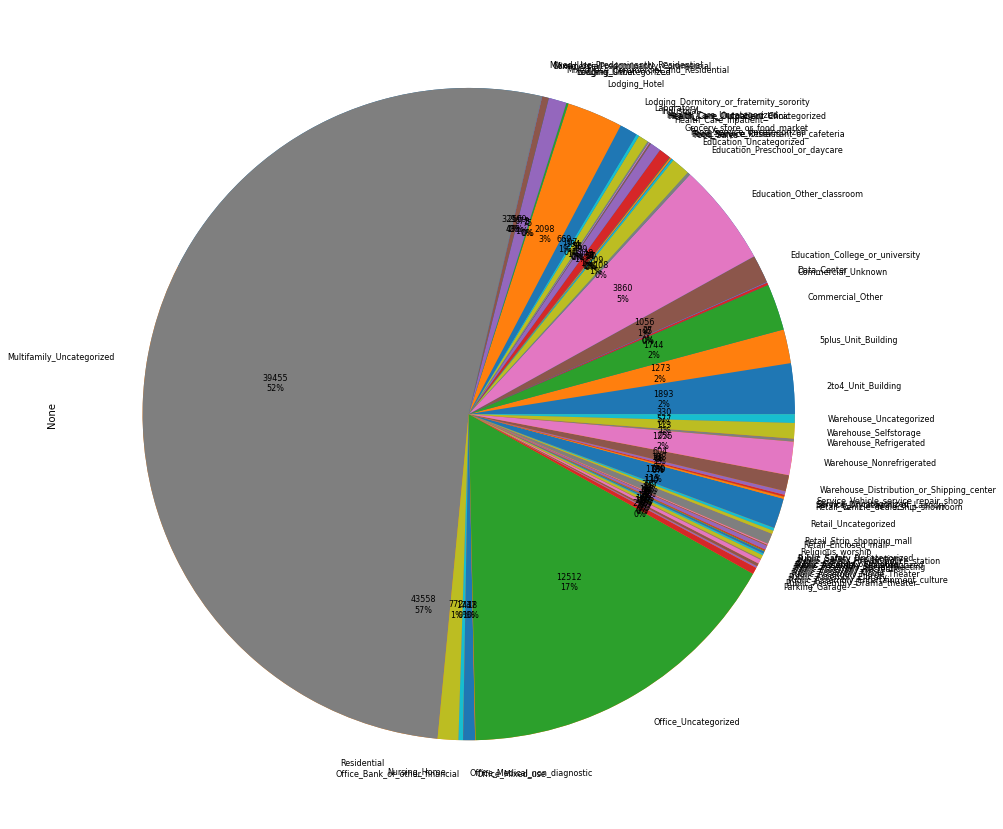

In [21]:
# setting random seed
#seed(123)
plt.rcParams['figure.figsize'] = [15, 15]
# state factor piechart
def label_function(val):
    return f'{val / 100 * len(train_df):.0f}\n{val:.0f}%'

train_df.groupby('building_class').size().plot(kind='pie', autopct=label_function, textprops={'fontsize': 8})
train_df.groupby('facility_type').size().plot(kind='pie', autopct=label_function, textprops={'fontsize': 8} )

## Correlation Analysis
- whole dataset
- building details
- weather anomalies and misc

FILTER THE CORRELATIONS ACCORDING THRESHOLDS

As can be observed from the plot above there are correlations but hard to see teh exact relationships.

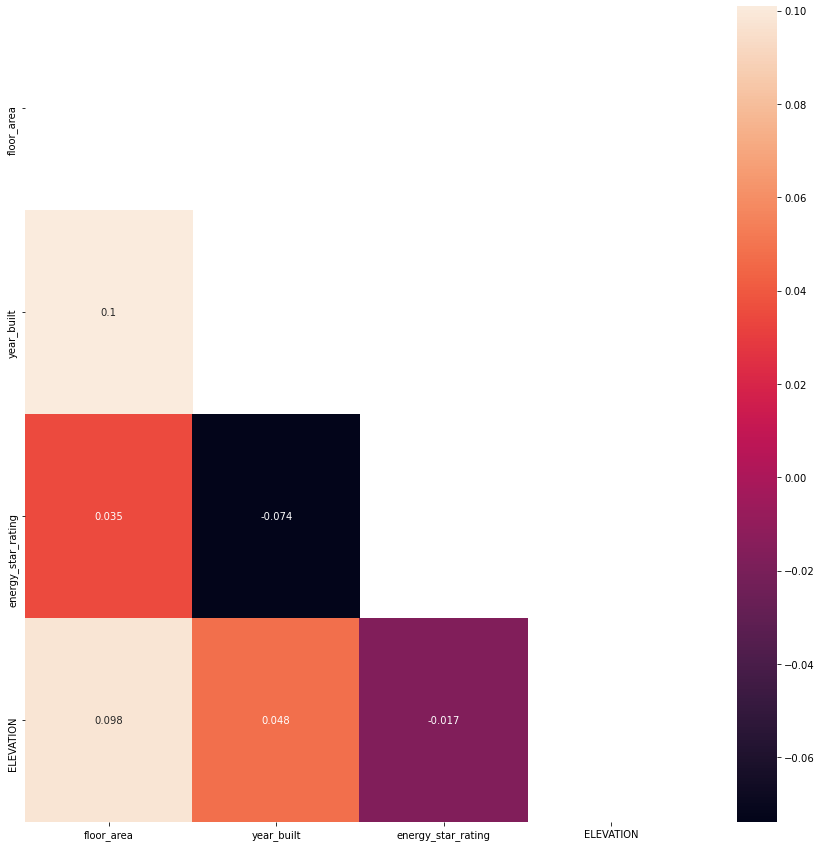

In [22]:
builddets=train_df[train_df.columns[1:8].values]
buildcorr = builddets.corr()
mask = np.zeros_like(buildcorr)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(buildcorr,mask=mask, annot=True)
plt.show()

there is not much correlation between the building details, hence better to use all of them in our model.

In [23]:
train_df.columns[-1]

'site_eui'

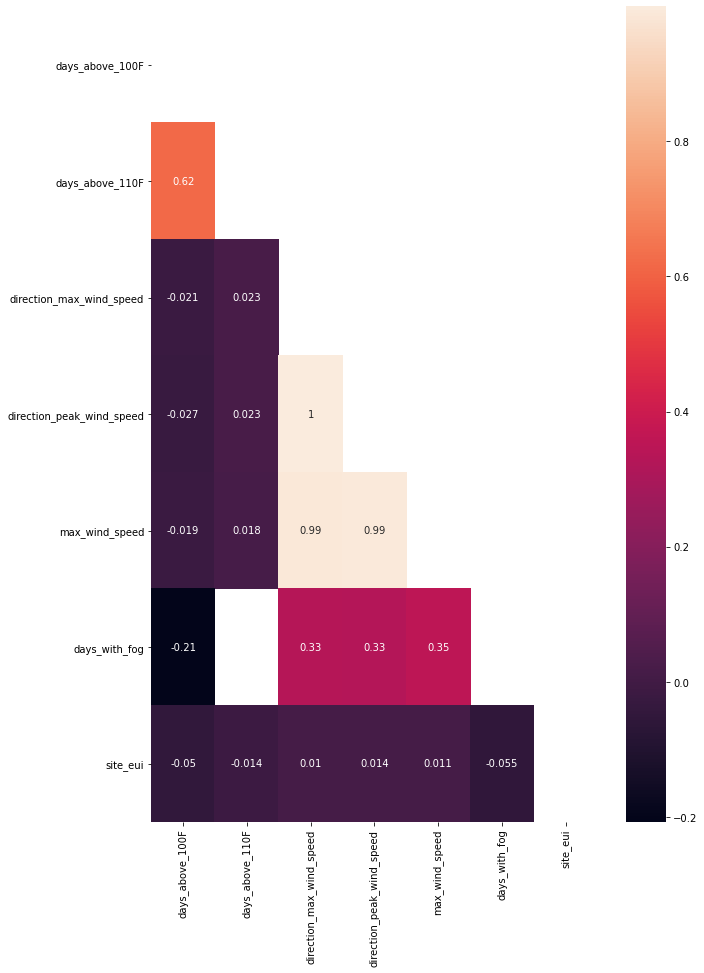

In [24]:

tempdets=train_df[train_df.columns[56:64].values]
tempcorr = tempdets.corr()
mask = np.zeros_like(tempcorr)
mask[np.triu_indices_from(mask)] = True
#fig, ax = plt.subplots()
plt.subplots(figsize=(10,15))
sns.heatmap(tempcorr,mask=mask, annot=True)

the above correlation plot looks at correlation between weather anomalies/and other information such as wind speed/snowfall and percipitation.

we can see that the avg temp is uncorrelated with days below 30F, this is expected as avg_temp is in F and days below is a count.

*analyse this futher*

scatter plots between eui and weather anomalies, to find the relationship.

In [25]:
# sns.pairplot(builddets)

In [26]:
regDat = train_df[['site_eui','year_built','floor_area','avg_temp']]

In [27]:
# sns.pairplot(regDat)

In [28]:
regDat.groupby('year_built').mean()

,site_eui,floor_area,avg_temp
year_built,,,
0.0,71.274566,204392.000000,59.902787
1600.0,60.701479,276000.000000,56.314574
1649.0,78.032138,108000.000000,56.133163
1732.0,35.077000,23860.000000,53.839335
1756.0,252.757716,873226.000000,53.488327
...,...,...,...
2011.0,68.133685,184426.078853,55.573554
2012.0,73.551631,185682.032861,55.547316
2013.0,80.872618,156332.072864,55.370754


In [29]:
# temperature_dat = train_df.loc[:,'january_min_temp':'december_max_temp']
# test = temperature_dat.filter(like='avg')
# #test.head()
# plt.figure(figsize=(10,5))
# plt.plot(test[:])
# plt.xlabel('obs')
# plt.ylabel('temp')
# plt.title('Average monthly temperatures across 7 years')
# plt.legend(test.columns,bbox_to_anchor=(1.04,1), loc="upper left")

In [30]:
# test = temperature_dat.filter(like='avg')
# test['year_factor'] = train_df.Year_Factor
# plt.rcParams['figure.figsize'] = [10, 5]

# #plt.figure(figsize=(10,5))

# test.groupby('year_factor').boxplot(figsize=(40,20))

#### split data into commercial and residential

In [31]:
train_df.columns

Index(['Year_Factor', 'State_Factor', 'building_class', 'facility_type',
       'floor_area', 'year_built', 'energy_star_rating', 'ELEVATION',
       'january_min_temp', 'january_avg_temp', 'january_max_temp',
       'february_min_temp', 'february_avg_temp', 'february_max_temp',
       'march_min_temp', 'march_avg_temp', 'march_max_temp', 'april_min_temp',
       'april_avg_temp', 'april_max_temp', 'may_min_temp', 'may_avg_temp',
       'may_max_temp', 'june_min_temp', 'june_avg_temp', 'june_max_temp',
       'july_min_temp', 'july_avg_temp', 'july_max_temp', 'august_min_temp',
       'august_avg_temp', 'august_max_temp', 'september_min_temp',
       'september_avg_temp', 'september_max_temp', 'october_min_temp',
       'october_avg_temp', 'october_max_temp', 'november_min_temp',
       'november_avg_temp', 'november_max_temp', 'december_min_temp',
       'december_avg_temp', 'december_max_temp', 'cooling_degree_days',
       'heating_degree_days', 'precipitation_inches', 'snowfall_inc

In [32]:
commTrain =train_df[train_df.building_class == 'Commercial'].drop('building_class',axis=1)
resiTrain =train_df[train_df.building_class == 'Residential'].drop('building_class',axis=1)
# len(commTrain) # 32199 rows
# len(resiTrain) # 43558 rows

#### Analysis to group according to temperatures. 

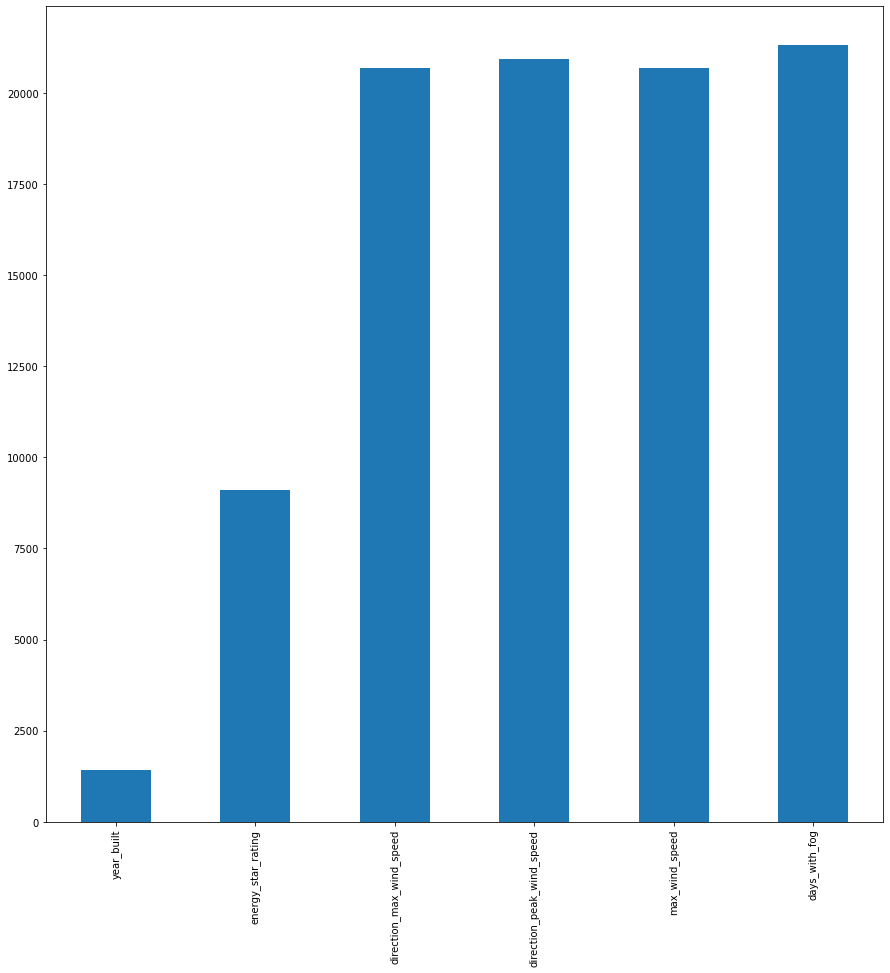

In [33]:
def na_count(df):
    x = df.isna().sum()
    x[x!=0].plot(kind='bar')
na_count(commTrain)

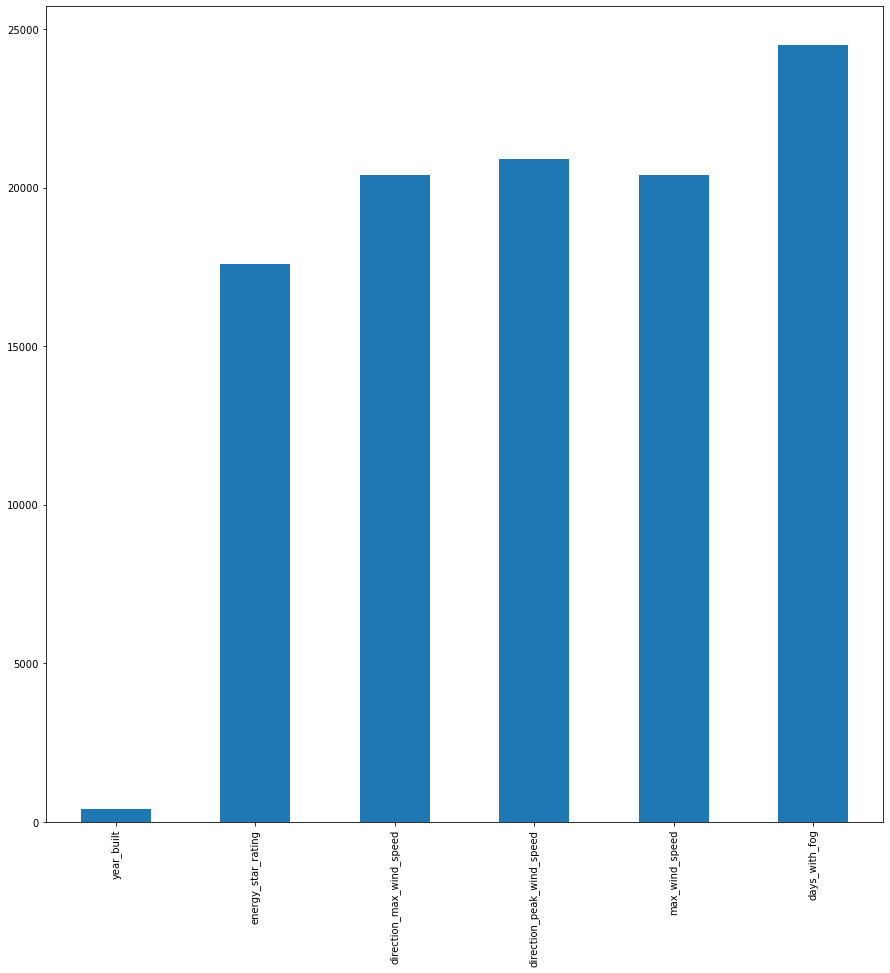

In [34]:
na_count(resiTrain)

In [35]:
len(resiTrain)
len(commTrain)

32199

In [36]:
sum(commTrain['days_with_fog'].isna())
#sum(commTrain['max_wind_speed'].isna())

21308

In [37]:
sum(resiTrain['days_with_fog'].isna())
sum(resiTrain['max_wind_speed'].isna())

20403

In [38]:
def tempDatMean(df):
    plt.rcParams['figure.figsize'] = [15, 15]
    temp_dat = df.loc[:,'january_min_temp':'december_max_temp']
    avg_dat = temp_dat.filter(like='avg')
    colNames = list(avg_dat.columns)+['site_eui']
    return (df.groupby('State_Factor')[colNames].mean())

#temp_dat_plot(train_df)


In [ ]:
tempDatMean(commTrain).plot(kind='bar',title='Commercial')

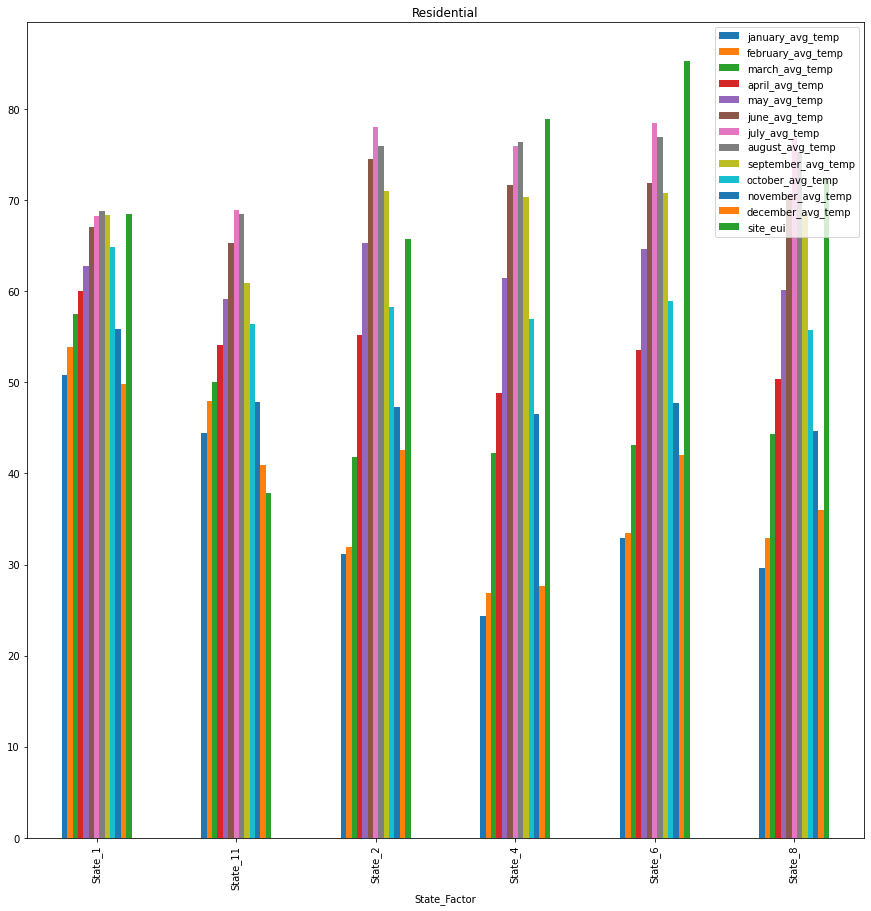

In [20]:
tempDatMean(resiTrain).plot(kind='bar',title='Residential')

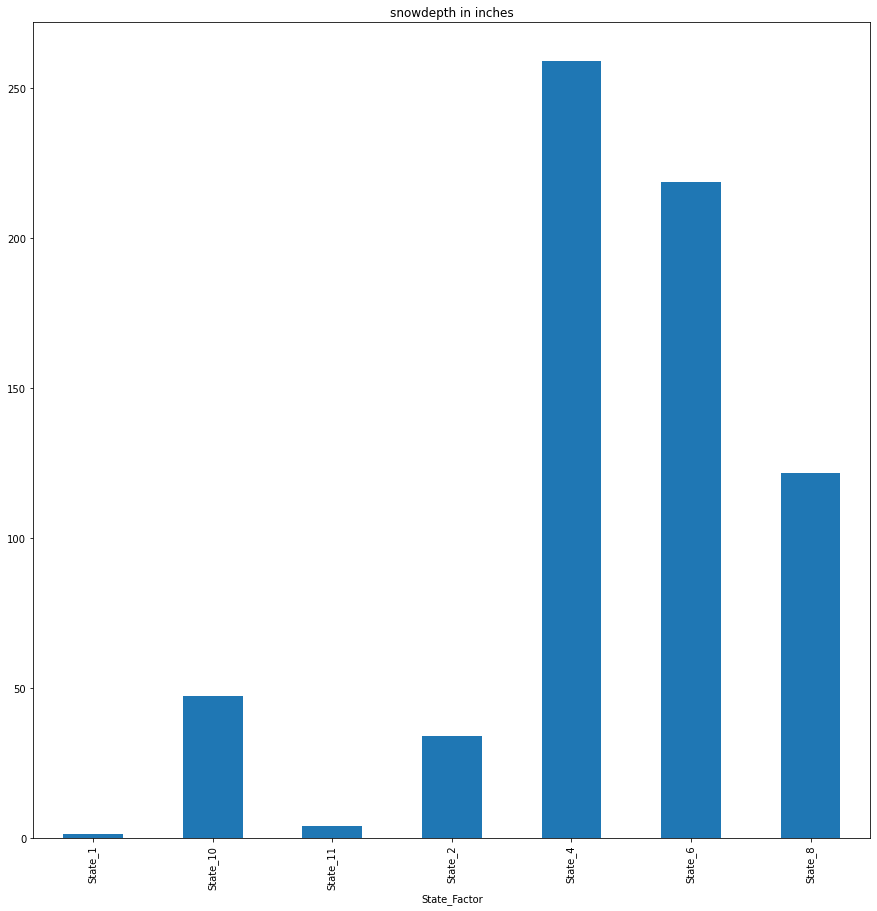

In [46]:
commTrain.groupby('State_Factor').snowdepth_inches.mean().plot(kind='bar',title='snowdepth in inches')

### Evaluating relationships through year_built
as we see above there is some missing data, so we are going to ignore those rows, to use year built as a dummy variable.


In [82]:
yearbuiltDf = train_df[train_df.year_built.isna()==False]
def commressplit(df):
    # takes in a dataframe
    comdf = df[df.building_class == 'Commercial'].drop('building_class',axis=1)
    redf = df[df.building_class == 'Residential'].drop('building_class',axis=1)
    return{'CommercialDf':comdf,'Residentialdf':redf}
comdf = commressplit(yearbuiltDf)['CommercialDf']
redf =commressplit(yearbuiltDf)['Residentialdf']

In [36]:
comdf.head()

,Year_Factor,State_Factor,facility_type,floor_area,year_built,energy_star_rating,ELEVATION,january_min_temp,january_avg_temp,january_max_temp,...,days_below_0F,days_above_80F,days_above_90F,days_above_100F,days_above_110F,direction_max_wind_speed,direction_peak_wind_speed,max_wind_speed,days_with_fog,site_eui
0,1,State_1,Grocery_store_or_food_market,61242.0,1942.0,11.0,2.4,36,50.5,68,...,0,14,0,0,0,1.0,1.0,1.0,NaN,248.682615
1,1,State_1,Warehouse_Distribution_or_Shipping_center,274000.0,1955.0,45.0,1.8,36,50.5,68,...,0,14,0,0,0,1.0,NaN,1.0,12.0,26.500150
2,1,State_1,Retail_Enclosed_mall,280025.0,1951.0,97.0,1.8,36,50.5,68,...,0,14,0,0,0,1.0,NaN,1.0,12.0,24.693619
3,1,State_1,Education_Other_classroom,55325.0,1980.0,46.0,1.8,36,50.5,68,...,0,14,0,0,0,1.0,NaN,1.0,12.0,48.406926
4,1,State_1,Warehouse_Nonrefrigerated,66000.0,1985.0,100.0,2.4,36,50.5,68,...,0,14,0,0,0,1.0,1.0,1.0,NaN,3.899395


In [45]:
from statsmodels.formula.api import ols

# fit = ols('site_eui ~ C(State_Factor) + C(facility_type)+C(year_built) + avg_temp', data=train_df).fit() 

In [85]:
# creating state factor dummy
#X = comdf.join(pd.get_dummies(comdf.State_Factor)).drop(['State_Factor'],axis=1)
#y = comdf.site_eui
all_columns = "+".join(comdf.columns.difference(["site_eui",'State_Factor','facility_type','year_built']))
fit = ols('site_eui ~ C(State_Factor) + C(facility_type)+C(year_built)+'+all_columns, data=comdf).fit() 

In [9]:
# fit.summary()

Looking at snow depth across States